In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.model_selection
from HW1.logit import Logit

In [2]:
def read_dataset(path):
    data = pd.read_csv(path)
    X = data.iloc[:,:-1].values
    y = data.iloc[:, -1].apply(lambda c: 1 if c == 'P' else -1).values
    return X, y

In [3]:
def calc_f_score(X, y, alpha):
    n_splits = 5
    cv = sklearn.model_selection.KFold(n_splits=n_splits, shuffle=True)
    mean_f_score = 0.0
    for train_indexes, test_indexes in cv.split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        y_train = y[train_indexes]
        y_test = y[test_indexes]

        classifier = Logit(alpha)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        tp = np.sum((y_pred == 1) & (y_test == 1))
        fp = np.sum((y_pred == 1) & (y_test != 1))
        tn = np.sum((y_pred != 1) & (y_test != 1))
        fn = np.sum((y_pred != 1) & (y_test == 1))

        if tp != 0:
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            f_score = 2 * precision * recall / (precision + recall)
            mean_f_score += f_score
    return mean_f_score / n_splits

In [4]:
X, y = read_dataset('data/geyser.csv')
best_alpha = None
max_f_score = -1
for alpha in [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]:
    cur_f_score = calc_f_score(X, y, alpha)
    print('alpha =', alpha, 'f-score =', cur_f_score)
    if cur_f_score > max_f_score:
        max_f_score = cur_f_score
        best_alpha = alpha

alpha = 0.0001 f-score = 0.8684772296015181
alpha = 0.001 f-score = 0.8730108511560124
alpha = 0.01 f-score = 0.8635487924054168
alpha = 0.1 f-score = 0.5530144927536231
alpha = 1.0 f-score = 0.3351515151515151
alpha = 10.0 f-score = 0.0
alpha = 100.0 f-score = 0.0


In [5]:
max_f_score, best_alpha

(0.8730108511560124, 0.001)

In [6]:
def draw(clf, X, ans, step_x, step_y):
    x_min, y_min = np.amin(X, axis = 0)
    x_max, y_max = np.amax(X, axis = 0)
    x_min -= step_x
    x_max += step_x
    y_min -= step_y
    y_max += step_y
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_x), np.arange(y_min, y_max, step_y))
    
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(12, 12))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    x0, y0 = X[ans != 1].T
    x1, y1 = X[ans == 1].T

    plt.pcolormesh(xx, yy, zz, cmap=matplotlib.colors.ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(x0, y0, color='red', s=100)
    plt.scatter(x1, y1, color='blue', s=100)
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()

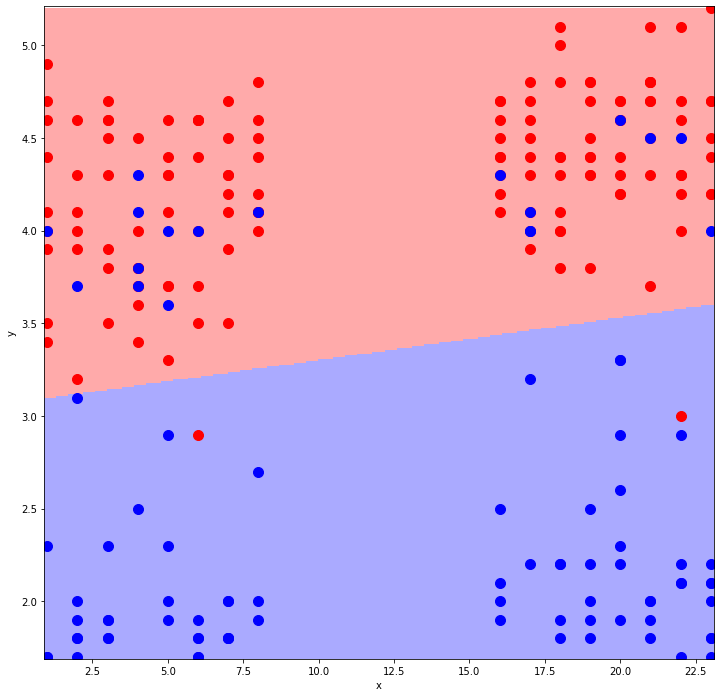

In [7]:
best_classifier = Logit(best_alpha)
best_classifier.fit(X, y)
draw(best_classifier, X, y, 0.1, 0.01)